In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

In [42]:
#load csv data in dataframe

pull_happy = "../Data/World Happiness 2016.csv"
pull_region = "../Data/Country Region.csv"
pull_coord = "../Clean Data/CoordinatesClean.csv"

happy = pd.read_csv(pull_happy)
Region = pd.read_csv(pull_region)
Coord = pd.read_csv(pull_coord)
#Region.head()
Coord.head()

,Country,Latitude,Longitude
0,Andorra,42.546245,1.601554
1,United Arab Emirates,23.424076,53.847818
2,Afghanistan,33.939110,67.709953
3,Antigua and Barbuda,17.060816,-61.796428
4,Anguilla,18.220554,-63.068615


In [43]:
#Merge region and continent information with happiness score data
#Intitial merge is an out merge
happy_region = pd.merge(happy, Region, how = "outer")
happy_region.count()
output_data_file = "Happy_Region.csv"
happy_region.to_csv(output_data_file, index=False)

#after looking at the csv output file, the countries names that did not match were reconciled with a replace statement.
C_rename4 = {"Bolivia (Plurinational State of)":"Bolivia","Iran (Islamic Republic of)":"Iran","Cote d'Ivoire":"Ivory Coast",
"China, Hong Kong SAR":"Hong Kong","Lao People's Democratic Republic":"Laos","Syrian Arab Republic":"Syria",
"The former Yugoslav Republic of Macedonia":"Macedonia","Russian Federation":"Russia",
"Republic of Korea":"South Korea","Republic of Moldova":"Moldova","United Kingdom of Great Britain":"United Kingdom",
"United Republic of Tanzania":"Tanzania","United States of America":"United States","Viet Nam":"Vietnam",
"Venezuela (Bolivarian Republic of)":"Venezuela"}
Region2 = Region.replace(C_rename4)

#this time a left merge is performed to keep all countries in the happiness data
happy_region = pd.merge(happy, Region2, how = "left")
happy_region.count()

#new data is sent to a csv for a check
output_data_file = "Happy_Region.csv"
happy_region.to_csv(output_data_file, index=False)


In [44]:
#Merge continent and coordinent data 
#Intitial merge is an outer merge
happy_region_coord = pd.merge(happy_region, Coord, how = "outer")
output_data_file = "Happy_Region_Coord.csv"
happy_region_coord.to_csv(output_data_file, index=False)

#after looking at the csv output file, the countries names that did not match were reconciled with a replace statement.
C_rename3 = {"Congo [Republic]":"Congo (Brazzaville)","Congo [DRC]":"Congo (Kinshasa)","Cote d'Ivoire":"Ivory Coast",
"Macedonia [FYROM]":"Macedonia","Myanmar [Burma]":"Myanmar"}
Coord2 = Coord.replace(C_rename3)

#This time a inner join is performed to ensure complete information
happy_region_coord = pd.merge(happy_region, Coord2, how = "inner")

#new data is sent to a csv for a check
output_data_file = "Happy_Region_Coord2.csv"
happy_region_coord.to_csv(output_data_file, index=False)
happy_region_coord.count()

Country            154
Happiness Rank     154
Happiness Score    154
Region             154
Continent          154
Latitude           154
Longitude          154
dtype: int64

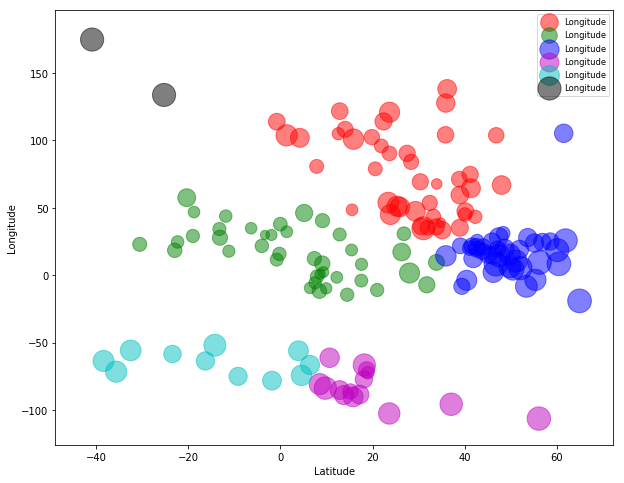

In [109]:
#plt of Latitude vs longitude with happiness indicated by size of marker
Continents = ["Asia","Africa","Europe","North America","South America", "Oceania"]
colors = ["r","g","b","m","c","k"]
fig_scatter, ax_scatter = plt.subplots(figsize = (10,8))
#loop through each cotinent to plot continents in different colors
for i,cont in enumerate(Continents):
    happy_cont = happy_region_coord[happy_region_coord["Continent"]==cont]
    ax_scatter.scatter(happy_cont["Latitude"],happy_cont["Longitude"], color = colors[i], 
                       s = (10*happy_cont["Happiness Score"]**2), alpha = .5)
ax_scatter.set_xlabel("Latitude")
ax_scatter.set_ylabel("Longitude")  
ax_scatter.set_title("")
ax_scatter.legend(loc="best", fontsize="small", fancybox=True)
fig_scatter.savefig("../ChartsTables/LatvLng.png")
#resulting graph is not very informative

In [6]:
#create a new data set that compares each contry with every other contry to caculated the distance between the two countries
#and the difference in their happiness scores.
#intialize lists that will be appended to for each pairwise country combination. 
country1 = []
country2 = []
cont1 = []
cont2 = []
reg1 = []
reg2 = []
happysc1 = []
happysc2 = []
happyrk1 = []
happyrk2 = []
lat1 = []
lat2 = []
lng1 = []
lng2 = []

#loop through each country and pair with every other country
cntry = happy_region_coord["Country"]
for i,c1 in enumerate(cntry):
    for j,c2 in enumerate(cntry):
        if j > i:
            country1.append(c1)
            country2.append(c2)
            cont1.append(happy_region_coord.iloc[i,4])
            cont2.append(happy_region_coord.iloc[j,4])
            reg1.append(happy_region_coord.iloc[i,3])
            reg2.append(happy_region_coord.iloc[j,3])
            happyrk1.append(happy_region_coord.iloc[i,1])
            happyrk2.append(happy_region_coord.iloc[j,1])
            happysc1.append(happy_region_coord.iloc[i,2])
            happysc2.append(happy_region_coord.iloc[j,2])
            lat1.append(happy_region_coord.iloc[i,5])
            lat2.append(happy_region_coord.iloc[j,5])
            lng1.append(happy_region_coord.iloc[i,6])
            lng2.append(happy_region_coord.iloc[j,6])
#combine columns into a dataframe
distancedf = pd.DataFrame({"Country1":country1,
                           "Country2":country2,
                           "Continent1":cont1,
                           "Continent2":cont2,
                           "Region1":reg1,
                           "Region2":reg2,
                          "Happiness Rank1":happyrk1,
                          "Happiness Rank2":happyrk2,
                          "Happiness Score1":happysc1,
                          "Happiness Score2":happysc2,
                          "Latitude1":lat1,
                          "Latitude2":lat2,
                          "Longitude1":lng1,
                          "Longitude2":lng2})

distancedf = distancedf[distancedf["Country1"] != distancedf["Country2"]]

#calulated differences in latitude and longitude and use pythagorean theorem to caluculate distance between countries
distancedf["Latitude Distance"] = abs(distancedf["Latitude1"]-distancedf["Latitude2"])
distancedf["Longitude Distance"] = abs(distancedf["Longitude1"]-distancedf["Longitude2"])
distancedf["Distance"] = (distancedf["Latitude Distance"]**2+distancedf["Longitude Distance"]**2)**(1/2)
distancedf["Rank Difference"] = abs(distancedf["Happiness Rank1"]-distancedf["Happiness Rank2"])
distancedf["Score Difference"] = abs(distancedf["Happiness Score1"]-distancedf["Happiness Score2"])
distancedf.head()

,Country1,Country2,Continent1,Continent2,Region1,Region2,Happiness Rank1,Happiness Rank2,Happiness Score1,Happiness Score2,Latitude1,Latitude2,Longitude1,Longitude2,Latitude Distance,Longitude Distance,Distance,Rank Difference,Score Difference
0,Denmark,Switzerland,Europe,Europe,Northern Europe,Western Europe,1,2,7.526,7.509,56.26392,46.818188,9.501785,8.227512,9.445732,1.274273,9.531297,1,0.017
1,Denmark,Iceland,Europe,Europe,Northern Europe,Northern Europe,1,3,7.526,7.501,56.26392,64.963051,9.501785,-19.020835,8.699131,28.522620,29.819704,2,0.025
2,Denmark,Norway,Europe,Europe,Northern Europe,Northern Europe,1,4,7.526,7.498,56.26392,60.472024,9.501785,8.468946,4.208104,1.032839,4.333001,3,0.028
3,Denmark,Finland,Europe,Europe,Northern Europe,Northern Europe,1,5,7.526,7.413,56.26392,61.924110,9.501785,25.748151,5.660190,16.246366,17.204132,4,0.113
4,Denmark,Canada,Europe,North America,Northern Europe,Northern America,1,6,7.526,7.404,56.26392,56.130366,9.501785,-106.346771,0.133554,115.848556,115.848633,5,0.122


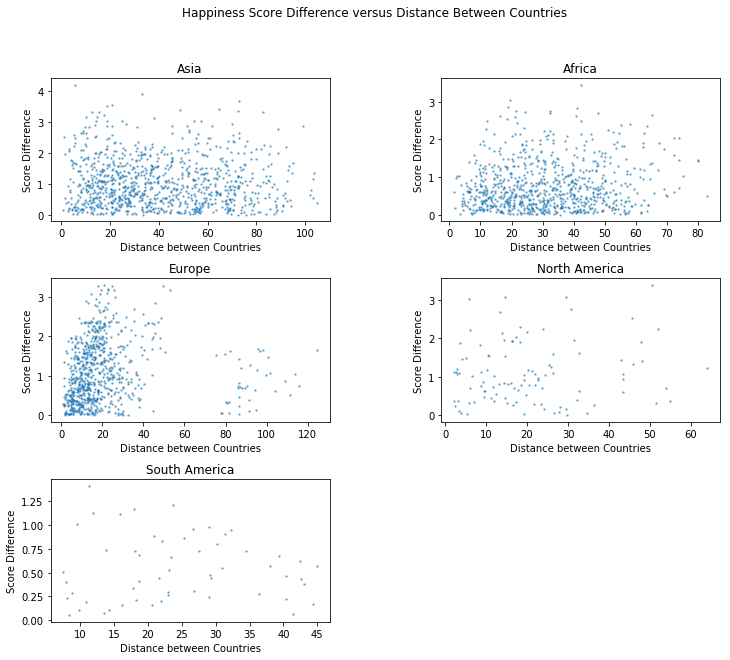

In [108]:
#Plot the difference in the happiness score versus the distance between countries by continent
Continents = ["Asia","Africa","Europe","North America","South America"]
fig = plt.figure(figsize = (12,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
fig.suptitle("Happiness Score Difference versus Distance Between Countries")
for i, cont in enumerate(Continents):
    distance_cont = distancedf[(distancedf["Continent1"] == cont)]
    distance_cont = distance_cont[(distance_cont["Continent2"] == cont)]
    ax = fig.add_subplot(3, 2, (i+1))
    ax.scatter(distance_cont["Distance"],distance_cont["Score Difference"], s = 2, alpha = .5)
    ax.set_xlabel("Distance between Countries")
    ax.set_ylabel("Score Difference")
    ax.set_title(cont)
fig.savefig("../ChartsTables/ScoreDifvDistance.png")

Fit for Asia: Score = -0.0012 * Distance + 1.0782
Fit for Africa: Score = 0.0042 * Distance + 0.621
Fit for Europe: Score = 0.0037 * Distance + 1.0229
Fit for North America: Score = 0.006 * Distance + 0.961
Fit for South America: Score = -0.0008 * Distance + 0.5634


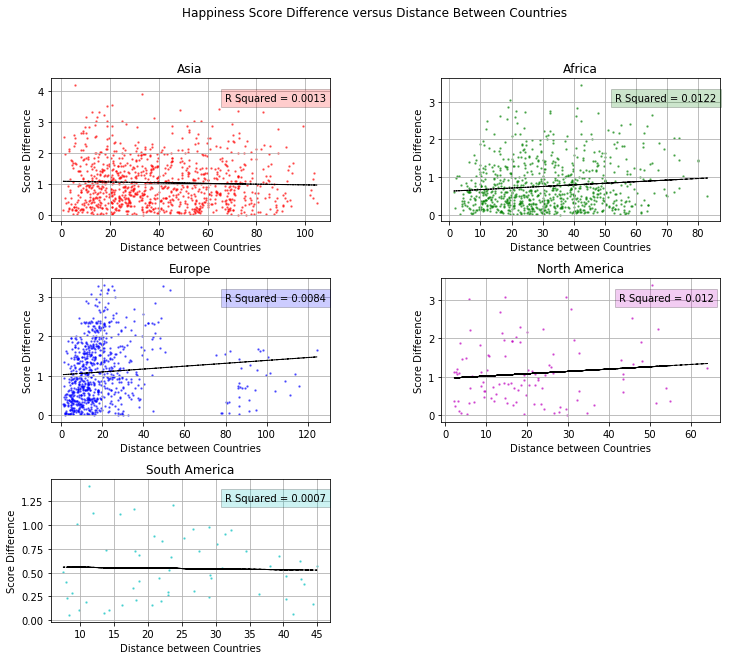

In [110]:
#add a regression fit and look at R squared
Continents = ["Asia","Africa","Europe","North America","South America"]
x = [0.6,2, 0.6,2, 0.6]
y = [3.3, 3.3, 1.9, 1.9, 0.5]
colors = ["r","g","b","m","c","k"]
fig2 = plt.figure(figsize = (12,10))
fig2.subplots_adjust(hspace=0.4, wspace=0.4)
fig2.suptitle("Happiness Score Difference versus Distance Between Countries")
for i, cont in enumerate(Continents):
    distance_cont = distancedf[(distancedf["Continent1"] == cont)]
    distance_cont = distance_cont[(distance_cont["Continent2"] == cont)]
    slope,intercept,r,p,stderr = stats.linregress(distance_cont["Distance"], distance_cont["Score Difference"])
    fit = slope * distance_cont["Distance"] + intercept
    ax2 = fig2.add_subplot(3, 2, (i+1))
    ax2.scatter(distance_cont["Distance"],distance_cont["Score Difference"], s = 2, alpha = .5, color = colors[i])
    ax2.plot(distance_cont["Distance"],fit, "k--", linewidth=1)
    ax2.set_xlabel("Distance between Countries")
    ax2.set_ylabel("Score Difference")
    ax2.grid()
    rs = r**2
    rsqu = f"R Squared = {round(rs,4)}"
    ax2.text(x[i], y[i], rsqu, horizontalalignment='center',verticalalignment='center', transform=ax.transAxes,
            bbox=dict(facecolor=colors[i], alpha=0.2))
    ax2.set_title(cont)
    print(f"Fit for {cont}: Score = {round(slope,4)} * Distance + {round(intercept,4)}")
fig2.savefig("../ChartsTables/DistancePredictor.png")

In [86]:
#focusing in on Europe, which looks like it has two separate trends
distance_europe = distancedf[(distancedf["Continent1"] == "Europe")]
distance_europe = distance_europe[(distance_europe["Continent2"] == "Europe")]
europe_far = distance_europe[distance_europe["Distance"]>60]
europe_far.head()

,Country1,Country2,Continent1,Continent2,Region1,Region2,Happiness Rank1,Happiness Rank2,Happiness Score1,Happiness Score2,Latitude1,Latitude2,Longitude1,Longitude2,Latitude Distance,Longitude Distance,Distance,Rank Difference,Score Difference
54,Denmark,Russia,Europe,Europe,Northern Europe,Eastern Europe,1,56,7.526,5.856,56.263920,61.52401,9.501785,105.318756,5.260090,95.816971,95.961245,55,1.670
206,Switzerland,Russia,Europe,Europe,Western Europe,Eastern Europe,2,56,7.509,5.856,46.818188,61.52401,8.227512,105.318756,14.705822,97.091244,98.198630,54,1.653
357,Iceland,Russia,Europe,Europe,Northern Europe,Eastern Europe,3,56,7.501,5.856,64.963051,61.52401,-19.020835,105.318756,3.439041,124.339591,124.387141,53,1.645
507,Norway,Russia,Europe,Europe,Northern Europe,Eastern Europe,4,56,7.498,5.856,60.472024,61.52401,8.468946,105.318756,1.051986,96.849810,96.855523,52,1.642
656,Finland,Russia,Europe,Europe,Northern Europe,Eastern Europe,5,56,7.413,5.856,61.924110,61.52401,25.748151,105.318756,0.400100,79.570605,79.571611,51,1.557


Fit for Europe without Russia: Score = 0.0259 * Distance + 0.689


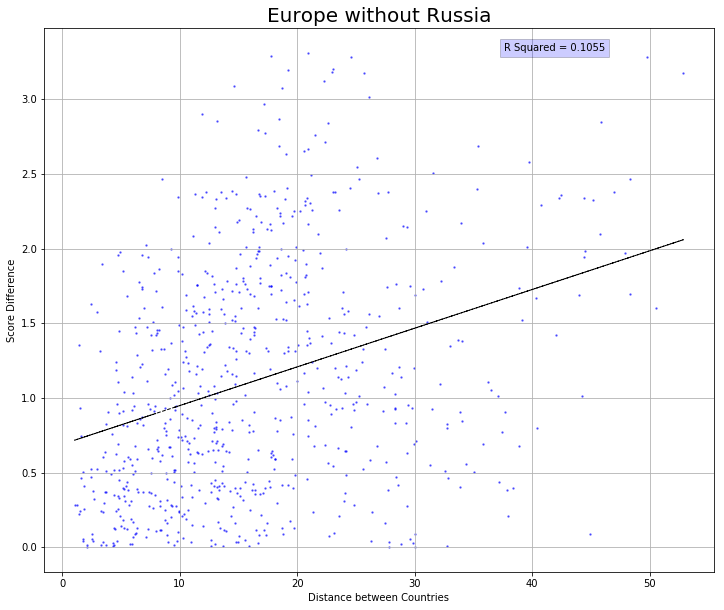

In [111]:
#Russia is very far away from many countries in Europe.  
#What would europe look like if we only looked at countries that aren't Russia?
not_russia = distance_europe[distance_europe["Country1"]!="Russia"]
not_russia = not_russia[not_russia["Country2"]!="Russia"]

#plot the happiness difference for europe, excluding Russia
fig3 = plt.figure(figsize = (12,10))

slope,intercept,r,p,stderr = stats.linregress(not_russia["Distance"], not_russia["Score Difference"])
fit = slope * not_russia["Distance"] + intercept
plt.scatter(not_russia["Distance"],not_russia["Score Difference"], s = 2, alpha = .5, color = "b")
plt.plot(not_russia["Distance"],fit, "k--", linewidth=1)
plt.xlabel("Distance between Countries")
plt.ylabel("Score Difference")
plt.grid()
rs = r**2
rsqu = f"R Squared = {round(rs,4)}"
fig3.text(1.6,3.3, rsqu, horizontalalignment='center',verticalalignment='center', transform=ax.transAxes,
            bbox=dict(facecolor="b", alpha=0.2))
plt.title("Europe without Russia", fontsize = 20)
print(f"Fit for Europe without Russia: Score = {round(slope,4)} * Distance + {round(intercept,4)}")
fig3.savefig("../ChartsTables/EuNoRussiaDistance.png")